<a href="https://colab.research.google.com/github/calerovillalobos10/Veax-vs-Pandas-Limpieza_Transf_Data-/blob/main/Tarea_PF3347.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tarea 2 Limpieza y Transformación de Datos

## Estudiantes

*   Bryan Thomas Calero Villalobos
*   Daniela Montero Parkinson
*   Christopher Zúñiga Cárdenas

# Uso Práctico

## Extracción de datos

Se descarga la librería gdown para poder descargar archivos grandes desde drive

Estas es una herramienta de Python que facilita la descarga de archivos desde Google Drive, incluidos archivos de gran tamaño. Dado que, los métodos convencionales como wget no pueden gestionar bien las restricciones de Google Drive, como los límites de tamaño o las confirmaciones de descarga. Esto gdown lo resuelve de forma automática, ya que está diseñada específicamente para interactuar con las URLs de Google Drive

In [1]:
!pip install gdown

Se descargar el archivo del .csv que se encuentra en drive

In [2]:
import gdown

url = 'https://drive.google.com/uc?id=1nTQxgLe5-QFFb7og5Oxz2LM1R8N2tE6-'
output = 'BenefitsCostSharing.csv'
gdown.download(url, output, quiet=False)

Downloading...
From (original): https://drive.google.com/uc?id=1nTQxgLe5-QFFb7og5Oxz2LM1R8N2tE6-
From (redirected): https://drive.google.com/uc?id=1nTQxgLe5-QFFb7og5Oxz2LM1R8N2tE6-&confirm=t&uuid=c4ab3bb8-5989-4b84-9f14-7100434ea9dc
To: /content/BenefitsCostSharing.csv
100%|██████████| 1.33G/1.33G [00:15<00:00, 84.2MB/s]


'BenefitsCostSharing.csv'

Se convierte el archivo csv descargado a DataFrame con el fin de poder manipular y revisar los datos de forma más sencilla

In [3]:
import pandas as pd

# Cargar el archivo CSV en un dataframe
df_benefits_cost_sharing = pd.read_csv('BenefitsCostSharing.csv')

# Mostrar las primeras filas del dataframe
df_benefits_cost_sharing.head()

<ipython-input-3-f44fca638cdb>:4: DtypeWarning: Columns (3,6,9,10,16,17,18) have mixed types. Specify dtype option on import or set low_memory=False.
  df_benefits_cost_sharing = pd.read_csv('BenefitsCostSharing.csv')


,BenefitName,BusinessYear,CoinsInnTier1,CoinsInnTier2,CoinsOutofNet,CopayInnTier1,CopayInnTier2,CopayOutofNet,EHBVarReason,Exclusions,...,LimitUnit,MinimumStay,PlanId,QuantLimitOnSvc,RowNumber,SourceName,StandardComponentId,StateCode,StateCode2,VersionNum
0,Routine Dental Services (Adult),2014,20%,NaN,20%,No Charge,NaN,No Charge,Above EHB,NaN,...,Dollars per Year,NaN,21989AK0010001-00,Yes,68,HIOS,21989AK0010001,AK,AK,6
1,Dental Check-Up for Children,2014,20%,NaN,20%,No Charge,NaN,No Charge,Substantially Equal,NaN,...,Visit(s) per 6 Months,NaN,21989AK0010001-00,Yes,104,HIOS,21989AK0010001,AK,AK,6
2,Basic Dental Care - Child,2014,40%,NaN,40%,No Charge,NaN,No Charge,Substantially Equal,NaN,...,NaN,NaN,21989AK0010001-00,NaN,110,HIOS,21989AK0010001,AK,AK,6
3,Orthodontia - Child,2014,50%,NaN,50%,No Charge,NaN,No Charge,Additional EHB Benefit,NaN,...,NaN,NaN,21989AK0010001-00,NaN,111,HIOS,21989AK0010001,AK,AK,6
4,Major Dental Care - Child,2014,50%,NaN,50%,No Charge,NaN,No Charge,Substantially Equal,NaN,...,NaN,NaN,21989AK0010001-00,NaN,112,HIOS,21989AK0010001,AK,AK,6


## Análisis EDA

### Explicación del DataSet ###

El dataset seleccionado pertenece al  Centro de Información al Consumidor y Supervisión de Seguros (CCIIO) de los Centros de Medicare y Medicaid (CMS). Según Centers for Medicare & Medicaid Services(2024), los datos contienen la información del 2014 al 2024 de las variantes en los planes del beneficio esencial de salud, los límites de cobertura, los costos planes de salud calificados (QHPs) y los costos de planes dentales independientes (SADPs).

A continuación se detallará las columnas del dataset:
* **BenefitName**: Nombre del beneficio asignado.

* **BusinessYear**: Año para el cual el plan ofrece cobertura a los afiliados.

* **CoinsInnTier1**: Valor numérico del porcentaje de coaseguro para los servicios dentro de la red para el nivel 1 de un beneficio.

* **CoinsInnTier2**: Valor numérico del porcentaje de coaseguro para los servicios dentro de la red para el nivel 2 de un beneficio.

* **CoinsOutofNet**: Valor numérico del porcentaje de coaseguro para los servicios fuera de la red.

* **CopayInnTier1**: Monto en dólares para el copago en red para el nivel 1 de un beneficio.

* **CopayInnTier2**: Monto en dólares para el copago en red para el nivel 2 de un beneficio.

* **CopayOutofNet**: Monto en dólares para el copago fuera de la red.

* **EHBVarReason**: Justificación para no utilizar la información preestablecida de los beneficios esenciales de salud del formulario.

* **Exclusions**: Campo opcional que indica exclusiones; si está en blanco, no se proporcionó valor, y podría truncarse a 256 caracteres si se exporta a Excel o Access.
* **ImportDate**: Fecha en la que se cargaron los datos.

* **IsCovered**: Indica si el plan de seguro incluye la cobertura de este beneficio.

* **IsEHB**: Indica si el beneficio está clasificado como esencial en salud.

* **IsExclFromInnMOOP**: Señala si el costo de este beneficio no se incluye en el máximo de gasto propio dentro de la red.

* **IsExclFromOonMOOP**: Señala si el costo del beneficio está excluido del límite máximo fuera de la red.

* **IsStateMandate**: Indica si el beneficio es obligatorio según las leyes del estado.

* **IsSubjToDedTier1**: Indica si el deducible de Nivel 1 aplica a este beneficio.

* **IsSubjToDedTier2**: Indica si el deducible de Nivel 2 aplica a este beneficio.

* **IssuerId**: Código de cinco dígitos que identifica al emisor en HIOS.

* **IssuerId2**: Segundo código de cinco dígitos que identifica al emisor en HIOS.

* **LimitQty**: Límite numérico que define la cobertura del beneficio.

* **LimitUnit**: Unidad en la que se mide el límite de la cobertura.

* **MinimumStay**: Número mínimo de horas de hospitalización necesarias para este beneficio.

* **PlanId**: Código de diecisiete caracteres que identifica la variante de reducción de costos de un plan.

* **QuantLimitOnSvc**: Indica si hay un límite numérico para este servicio o beneficio.

* **RowNumber**: Número de fila en la plantilla de datos.

* **SourceName**: Identificador de la fuente de los datos importados.

* **StandardComponentId**: Código de catorce caracteres que identifica el componente estándar de un plan en HIOS.

* **StateCode**: Código de dos letras que representa el estado donde se ofrece el plan.

* **StateCode2**: Segundo código de dos letras que indica el estado donde se ofrece el plan.

* **VersionNum**: Número de versión de la importación de los datos.

###Exploración profunda del conjunto de datos###


####Consistencia y Formato de Datos####

Para la exploración del tipo de datos de cada columna, se utiliza el conocimiento dato por Centers for Medicare & Medicaid Services(2024) en donde describen la definicion de cada columna, con esto, se puede comprobar la incongruencia en el tipo de dato de cada columna.

In [4]:
print(f'Información del Data Frame: \n')
df_benefits_cost_sharing.info() # nos dice el tipo de dato por columna y cantidad de nulos

Información del Data Frame: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5048408 entries, 0 to 5048407
Data columns (total 32 columns):
 #   Column               Dtype  
---  ------               -----  
 0   BenefitName          object 
 1   BusinessYear         int64  
 2   CoinsInnTier1        object 
 3   CoinsInnTier2        object 
 4   CoinsOutofNet        object 
 5   CopayInnTier1        object 
 6   CopayInnTier2        object 
 7   CopayOutofNet        object 
 8   EHBVarReason         object 
 9   Exclusions           object 
 10  Explanation          object 
 11  ImportDate           object 
 12  IsCovered            object 
 13  IsEHB                object 
 14  IsExclFromInnMOOP    object 
 15  IsExclFromOonMOOP    object 
 16  IsStateMandate       object 
 17  IsSubjToDedTier1     object 
 18  IsSubjToDedTier2     object 
 19  IssuerId             int64  
 20  IssuerId2            int64  
 21  LimitQty             float64
 22  LimitUnit            object 
 23  Mi

Según se observa en el resumen  de las columnas, existen 3 tipos de datos en las 32 columnas, object, int64 y float64. Las columnas object pueden representar datos categoricos o identificadores de relaciones(id).
Las unicas columnas que poseen datos numericos son IssuerId, IssuerId2, RowNumner, BusinessYear, LimitQty, MinimumStay y VersionNum.   



Para obtener las columnas con tipos de datos númericos se puede utilizar el comando ".describe" que ademas retorna los datos de: promedio, conteo, min, max , persentiles 25/50/75 y desviacion estandar por cada variable.

In [5]:
print(f'Descripción de datos: \n')
df_benefits_cost_sharing.describe()

Descripción de datos: 



,BusinessYear,IssuerId,IssuerId2,LimitQty,MinimumStay,RowNumber,VersionNum
count,5.048408e+06,5.048408e+06,5.048408e+06,687683.000000,16727.000000,5.048408e+06,5.048408e+06
mean,2.015127e+03,5.220360e+04,5.220360e+04,142.399374,47.937048,9.839018e+01,7.637094e+00
std,7.563664e-01,2.592498e+04,2.592498e+04,1723.372817,5.892297,2.177890e+01,3.803627e+00
min,2.014000e+03,1.004600e+04,1.004600e+04,1.000000,5.000000,6.100000e+01,1.000000e+00
25%,2.015000e+03,3.253600e+04,3.253600e+04,1.000000,48.000000,8.000000e+01,5.000000e+00
50%,2.015000e+03,4.839600e+04,4.839600e+04,20.000000,48.000000,9.900000e+01,7.000000e+00
75%,2.016000e+03,7.498000e+04,7.498000e+04,40.000000,48.000000,1.170000e+02,9.000000e+00
max,2.016000e+03,9.996900e+04,9.996900e+04,75000.000000,90.000000,1.560000e+02,2.400000e+01


In [6]:
#Devuelve la muestra de los 5 primeros registros de la Data
print(f'Muestra de datos: \n')
df_benefits_cost_sharing.head(10)

Muestra de datos: 



,BenefitName,BusinessYear,CoinsInnTier1,CoinsInnTier2,CoinsOutofNet,CopayInnTier1,CopayInnTier2,CopayOutofNet,EHBVarReason,Exclusions,...,LimitUnit,MinimumStay,PlanId,QuantLimitOnSvc,RowNumber,SourceName,StandardComponentId,StateCode,StateCode2,VersionNum
0,Routine Dental Services (Adult),2014,20%,NaN,20%,No Charge,NaN,No Charge,Above EHB,NaN,...,Dollars per Year,NaN,21989AK0010001-00,Yes,68,HIOS,21989AK0010001,AK,AK,6
1,Dental Check-Up for Children,2014,20%,NaN,20%,No Charge,NaN,No Charge,Substantially Equal,NaN,...,Visit(s) per 6 Months,NaN,21989AK0010001-00,Yes,104,HIOS,21989AK0010001,AK,AK,6
2,Basic Dental Care - Child,2014,40%,NaN,40%,No Charge,NaN,No Charge,Substantially Equal,NaN,...,NaN,NaN,21989AK0010001-00,NaN,110,HIOS,21989AK0010001,AK,AK,6
3,Orthodontia - Child,2014,50%,NaN,50%,No Charge,NaN,No Charge,Additional EHB Benefit,NaN,...,NaN,NaN,21989AK0010001-00,NaN,111,HIOS,21989AK0010001,AK,AK,6
4,Major Dental Care - Child,2014,50%,NaN,50%,No Charge,NaN,No Charge,Substantially Equal,NaN,...,NaN,NaN,21989AK0010001-00,NaN,112,HIOS,21989AK0010001,AK,AK,6
5,Basic Dental Care - Adult,2014,40%,NaN,40%,No Charge,NaN,No Charge,Above EHB,NaN,...,Dollars per Year,NaN,21989AK0010001-00,Yes,113,HIOS,21989AK0010001,AK,AK,6
6,Orthodontia - Adult,2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,21989AK0010001-00,NaN,114,HIOS,21989AK0010001,AK,AK,6
7,Major Dental Care - Adult,2014,50%,NaN,50%,No Charge,NaN,No Charge,Above EHB,NaN,...,Dollars per Year,NaN,21989AK0010001-00,Yes,115,HIOS,21989AK0010001,AK,AK,6
8,Accidental Dental,2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,21989AK0010001-00,NaN,118,HIOS,21989AK0010001,AK,AK,6
9,Routine Dental Services (Adult),2014,20%,NaN,20%,No Charge,NaN,No Charge,Above EHB,NaN,...,Dollars per Year,NaN,21989AK0010001-01,Yes,68,HIOS,21989AK0010001,AK,AK,6


En las columnas CoinsInnTier1 y CoinsOutofNet, se pueden reemplazar los caracteres no numéricos para facilitar el análisis cuantitativo. Además, según la documentación, las columnas CopayInnTier1 y CopayInnTier2 utilizan tanto números como la palabra “No Charge” o valores vacíos para indicar la ausencia de datos. Sin embargo, se debe usar un valor numérico cuando esté disponible.

####Exploración de valores nulos###

Con el comando ".isnull().sum()" se determina las columnas que poseen datos vacíos en el conjunto de datos y la cantidad que poseen.

In [7]:
print(f'Cantidad de nulos: \n') #contar datos nullos
df_benefits_cost_sharing.isnull().sum()

Cantidad de nulos: 



,0
BenefitName,0
BusinessYear,0
CoinsInnTier1,1113847
CoinsInnTier2,4571587
CoinsOutofNet,1113847
CopayInnTier1,1113847
CopayInnTier2,4571587
CopayOutofNet,1113849
EHBVarReason,3020737
Exclusions,4572247


####Detección de datos duplicados####

Para evitar inflar innecesariamente los resultados de las estadísticas y llevar a conclusiones incorrectas, es necesario eliminar los duplicados del dataset.

Determinamos si el dataset posee datos duplicados con ".duplicated().sum()" para valorar si a la hora de limpiar los datos se salta la eliminación de datos duplicados.

In [8]:
print(f'Cantidad de duplicados: \n') #contar datos duplicados
df_benefits_cost_sharing.duplicated().sum()

Cantidad de duplicados: 



86

####Identificar relevancia de las variables####

 Identificar y descartar columnas que no aportan información relevante para el análisis. Las columnas con 1 o menos subniveles no son útiles porque no varían y, por lo tanto, no pueden contribuir a la diferenciación o clasificación en el análisis de datos.

In [9]:
cols_cat = df_benefits_cost_sharing.columns.tolist() # se capturan los nombres de las columnas del DF

# se inicializa un array para capturar las columnas que se descartarán por poca relevancia
col_descartadas = []

#Con este fragmento de codigo nos damos cuanta cuantos subniveles tiene cada columna, esto nos ayuda a ver cuales son las variables finales para la data
for col in cols_cat:
  print(f'Columna {col}: {df_benefits_cost_sharing[col].nunique()} subniveles o distintos.')

  if(df_benefits_cost_sharing[col].nunique() <= 1):
    col_descartadas.append(col)


Columna BenefitName: 861 subniveles o distintos.
Columna BusinessYear: 3 subniveles o distintos.
Columna CoinsInnTier1: 115 subniveles o distintos.
Columna CoinsInnTier2: 37 subniveles o distintos.
Columna CoinsOutofNet: 60 subniveles o distintos.
Columna CopayInnTier1: 516 subniveles o distintos.
Columna CopayInnTier2: 278 subniveles o distintos.
Columna CopayOutofNet: 232 subniveles o distintos.
Columna EHBVarReason: 12 subniveles o distintos.
Columna Exclusions: 1720 subniveles o distintos.
Columna Explanation: 6227 subniveles o distintos.
Columna ImportDate: 266 subniveles o distintos.
Columna IsCovered: 3 subniveles o distintos.
Columna IsEHB: 1 subniveles o distintos.
Columna IsExclFromInnMOOP: 5 subniveles o distintos.
Columna IsExclFromOonMOOP: 4 subniveles o distintos.
Columna IsStateMandate: 1 subniveles o distintos.
Columna IsSubjToDedTier1: 5 subniveles o distintos.
Columna IsSubjToDedTier2: 4 subniveles o distintos.
Columna IssuerId: 910 subniveles o distintos.
Columna Iss

####Corelación de las variables de clasificación####
Vamos a realizar el mismo análisis de las columnas con tipo de datos diferentes al númerico.
Como alternativa para realizar la correlación y mostrarla en un único mapa de calor tomando cierta cantidad de registros como muestra, se utiliza el algoritmo de creamers de la biblioteca scipy.stats. Para la implementación del método de cramers se tomo el artículo de Nik. (n.d.) en donde da la solución que se adecua a nuestro conjunto de datos.
Según Cramér (1946), el algoritmo permite generar una medida para determinar la fuerza en la relación de variables categóricos.

In [ ]:
import numpy as np
from scipy.stats import chi2_contingency
columnas_categoricas = df_benefits_cost_sharing
# Función para calcular el coeficiente de Cramér
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n if n != 0 else 0
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1) if n > 1 else 0)
    rcorr = r - ((r-1)**2)/(n-1) if n > 1 else r
    kcorr = k - ((k-1)**2)/(n-1) if n > 1 else k
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)) if min((kcorr-1), (rcorr-1)) > 0 else 0)

# Selección de columnas categóricas
columnas_categoricas = df_benefits_cost_sharing.select_dtypes(exclude=['number', 'int64', 'float64']).columns

# Muestreo del conjunto de datos para reducir el uso de memoria
datos_muestra = df_benefits_cost_sharing.sample(n=1000, random_state=42)

# Crear una matriz vacía para almacenar los coeficientes de Cramér
matriz_cramer = pd.DataFrame(index=columnas_categoricas, columns=columnas_categoricas)

# Calcular el coeficiente de Cramér para cada par de columnas categóricas
for col1 in columnas_categoricas:
    for col2 in columnas_categoricas:
        if col1 != col2:
            matriz_cramer.loc[col1, col2] = cramers_v(datos_muestra[col1], datos_muestra[col2])
        else:
            matriz_cramer.loc[col1, col2] = 1.0  # La correlación consigo misma es 1

# Convertir a tipo float
matriz_cramer = matriz_cramer.astype(float)
matriz_cramer

Una vez se posea la matriz de correlación, procedemos a generar un mapa de calor para analizar los datos de una manera visual con el comando ".heatmap()" de la librería seaborn.
Para el análisis del mapa se toma lo siguiente:
* Colores cálidos(rojos): correlaciones positivas. Indica que las columnas relacionadas van a aumentar o disminuir si la relación padre lo hace. Tambien, se puede intuir que si tienen una relación fuerte, se puede predecir o estimar el valor de la otra relacion.
* Colores fríos(azules): correlaciones negativas. Indica que las columnas relacionadas van a hacer lo contrario en caso de que disminuya o aumente la columna padre. Tambien, si es una relación debil, conocer una de las relaciones no ayuda a predecir el valor de la otra.
* Colores de la gama del blanco: poca o ninguna correlación.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualizar la matriz de correlación categórica con un mapa de calor
plt.figure(figsize=(15, 8))
sns.heatmap(matriz_cramer, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Mapa de calor de la correlación categórica (Coeficiente de Cramér)')
plt.show()

## Limpieza de datos y Transformación##

Debido a las limitaciones de memoria en Google Colab, se procede a eliminar los datos generados durante el análisis exploratorio de datos (EDA) para liberar recursos.

In [13]:
import gc

# Eliminar las variables
del col_descartadas
del columnas_categoricas
del datos_muestra
del matriz_cramer

# Forzar la recolección de basura
gc.collect()

47312

###Pandas###

Primero, se iniciará con la limpieza y transformación de datos utilizando la biblioteca Pandas.
Se inicia con la familiarización de datas he información general



In [13]:
import gc
import pandas as pd
from pandas import json_normalize
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

df_pandas= df_benefits_cost_sharing.copy()
df_pandas.head()

,BenefitName,BusinessYear,CoinsInnTier1,CoinsInnTier2,CoinsOutofNet,CopayInnTier1,CopayInnTier2,CopayOutofNet,EHBVarReason,Exclusions,...,LimitUnit,MinimumStay,PlanId,QuantLimitOnSvc,RowNumber,SourceName,StandardComponentId,StateCode,StateCode2,VersionNum
0,Routine Dental Services (Adult),2014,20%,NaN,20%,No Charge,NaN,No Charge,Above EHB,NaN,...,Dollars per Year,NaN,21989AK0010001-00,Yes,68,HIOS,21989AK0010001,AK,AK,6
1,Dental Check-Up for Children,2014,20%,NaN,20%,No Charge,NaN,No Charge,Substantially Equal,NaN,...,Visit(s) per 6 Months,NaN,21989AK0010001-00,Yes,104,HIOS,21989AK0010001,AK,AK,6
2,Basic Dental Care - Child,2014,40%,NaN,40%,No Charge,NaN,No Charge,Substantially Equal,NaN,...,NaN,NaN,21989AK0010001-00,NaN,110,HIOS,21989AK0010001,AK,AK,6
3,Orthodontia - Child,2014,50%,NaN,50%,No Charge,NaN,No Charge,Additional EHB Benefit,NaN,...,NaN,NaN,21989AK0010001-00,NaN,111,HIOS,21989AK0010001,AK,AK,6
4,Major Dental Care - Child,2014,50%,NaN,50%,No Charge,NaN,No Charge,Substantially Equal,NaN,...,NaN,NaN,21989AK0010001-00,NaN,112,HIOS,21989AK0010001,AK,AK,6


Identidicación de niveles o datos distintos para ver si tienen relevancia para el analisis

In [14]:
cols_cat = df_pandas.columns.tolist() # se capturan los nombres de las columnas del DF

# se inicializa un array para capturar las columnas que se descartarán por poca relevancia
col_descartadas = []

#Con este fragmento de codigo nos damos cuanta cuantos subniveles tiene cada columna, esto nos ayuda a ver cuales son las variables finales para la data
for col in cols_cat:
  print(f'Columna {col}: {df_pandas[col].nunique()} subniveles o distintos.')

  if(df_pandas[col].nunique() <= 1):
    col_descartadas.append(col)



Columna BenefitName: 861 subniveles o distintos.
Columna BusinessYear: 3 subniveles o distintos.
Columna CoinsInnTier1: 115 subniveles o distintos.
Columna CoinsInnTier2: 37 subniveles o distintos.
Columna CoinsOutofNet: 60 subniveles o distintos.
Columna CopayInnTier1: 516 subniveles o distintos.
Columna CopayInnTier2: 278 subniveles o distintos.
Columna CopayOutofNet: 232 subniveles o distintos.
Columna EHBVarReason: 12 subniveles o distintos.
Columna Exclusions: 1720 subniveles o distintos.
Columna Explanation: 6227 subniveles o distintos.
Columna ImportDate: 266 subniveles o distintos.
Columna IsCovered: 3 subniveles o distintos.
Columna IsEHB: 1 subniveles o distintos.
Columna IsExclFromInnMOOP: 5 subniveles o distintos.
Columna IsExclFromOonMOOP: 4 subniveles o distintos.
Columna IsStateMandate: 1 subniveles o distintos.
Columna IsSubjToDedTier1: 5 subniveles o distintos.
Columna IsSubjToDedTier2: 4 subniveles o distintos.
Columna IssuerId: 910 subniveles o distintos.
Columna Iss

Al haber detectado las columnas menos relevantes o que no serán útiles se eliminan para optimizar o reducir la carga de procesamiento al realizar el respectivo análisis o sus visualizaciones

Eliminación de espacios en blanco en los nombres de las columnas

In [15]:
df_pandas.columns = df_pandas.columns.str.strip()

In [16]:
#
df_pandas.drop(columns=col_descartadas, inplace=True) # Con inplace=True: modifica datos directamente, sin crea un dataframe nuevo
del col_descartadas
del cols_cat
gc.collect()

0

Se buscan y eliminan los duplicados

In [17]:
# Inicio duplicados
duplicados = df_pandas.duplicated().sum() #contar datos duplicados

#Elimina los duplicados si es que los hay
if duplicados > 1:
  print(f'Tamaño previo: {df_pandas.shape}')
  df_pandas.drop_duplicates(inplace=True)
  print(f'Tamaño posterior: {df_pandas.shape}')
else:
  print('No hay filas duplicadas')
del duplicados
gc.collect()

Tamaño previo: (5048408, 30)
Tamaño posterior: (5048322, 30)


0

In [18]:
# Normalizar los datos
datos_normalizados = json_normalize(df_pandas)

# Si hay parámetros anidados dentro de los resultados, normalizarlos también
if 'parameters' in datos_normalizados.columns:
  df_parameters = json_normalize(datos_normalizados['parameters'].explode())
  datos_normalizados = datos_normalizados.drop(columns=['parameters']).join(df_parameters, rsuffix='_param')

  df_pandas = pd.DataFrame(datos_normalizados)
  del datos_normalizados
  del df_parameters
  gc.collect()

Se define que para los datos nulos, se manejan para los alfanumericos con un #N/D y para los numericos -1 en el caso de los date no se localizaron nulos

In [19]:
df_pandas.fillna({
    'CoinsInnTier1': '#N/D',
    'CoinsInnTier2': '#N/D',
    'CoinsOutofNet': '#N/D',
    'CopayInnTier1': '#N/D',
    'CopayInnTier2': '#N/D',
    'CopayOutofNet': '#N/D',
    'EHBVarReason': '#N/D',
    'Exclusions': '#N/D',
    'Explanation': '#N/D',
    'IsCovered': '#N/D',
    'IsEHB': '#N/D',
    'IsExclFromInnMOOP': '#N/D',
    'IsExclFromOonMOOP': '#N/D',
    'IsStateMandate': '#N/D',
    'IsSubjToDedTier1': '#N/D',
    'IsSubjToDedTier2': '#N/D',
    'LimitQty': -1,
    'LimitUnit': '#N/D',
    'MinimumStay': -1,
    'QuantLimitOnSvc': '#N/D',
}, inplace=True)

df_pandas.isnull().sum()

,0
BenefitName,0
BusinessYear,0
CoinsInnTier1,0
CoinsInnTier2,0
CoinsOutofNet,0
CopayInnTier1,0
CopayInnTier2,0
CopayOutofNet,0
EHBVarReason,0
Exclusions,0


Formato de datetime para los campos fecha

In [20]:
df_pandas['ImportDate'] = pd.to_datetime(df_pandas['ImportDate'],format='mixed')
df_pandas.info()


<class 'pandas.core.frame.DataFrame'>
Index: 5048322 entries, 0 to 5048407
Data columns (total 30 columns):
 #   Column               Dtype         
---  ------               -----         
 0   BenefitName          object        
 1   BusinessYear         int64         
 2   CoinsInnTier1        object        
 3   CoinsInnTier2        object        
 4   CoinsOutofNet        object        
 5   CopayInnTier1        object        
 6   CopayInnTier2        object        
 7   CopayOutofNet        object        
 8   EHBVarReason         object        
 9   Exclusions           object        
 10  Explanation          object        
 11  ImportDate           datetime64[ns]
 12  IsCovered            object        
 13  IsExclFromInnMOOP    object        
 14  IsExclFromOonMOOP    object        
 15  IsSubjToDedTier1     object        
 16  IsSubjToDedTier2     object        
 17  IssuerId             int64         
 18  IssuerId2            int64         
 19  LimitQty             float

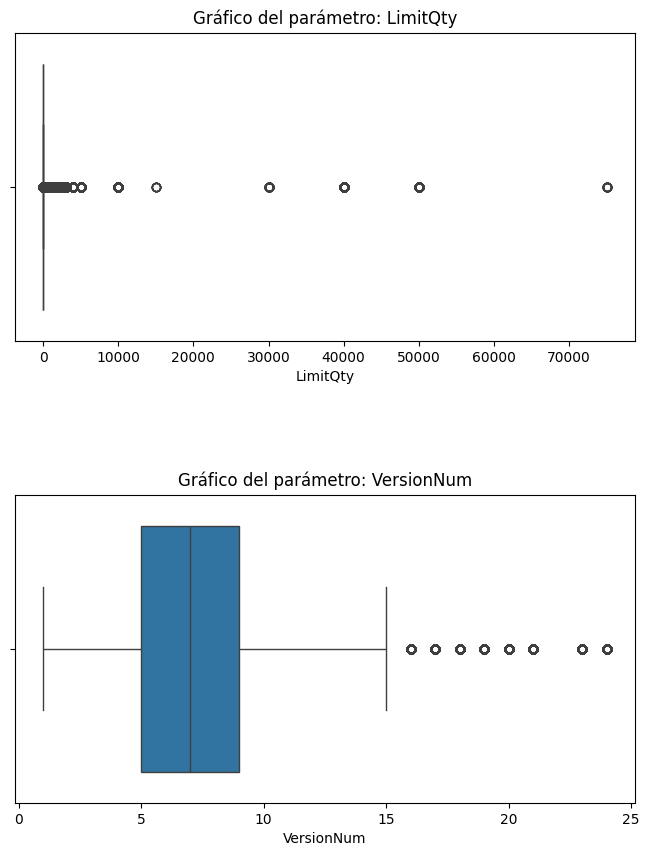

326

In [21]:
#revision de outliers en variables numericas
cols_num = ['LimitQty','VersionNum']

# Define la estructura del gráfico
fig, ax = plt.subplots(nrows = len(cols_num), ncols = 1, figsize = (8,10))
fig.subplots_adjust(hspace = 0.5) # Espacio entre gráficos

for i, col in enumerate(cols_num):
    sns.boxplot(x = col, data = df_pandas, ax = ax[i]) # información para crear el gráfico
    ax[i].set_title(f'Gráfico del parámetro: {col}') # Nombre del gráfico

plt.show() # Muestra el gráfico
del cols_num
del fig
del ax
gc.collect()


Se utiliza el método quantile para eliminar los outliners

In [22]:
# Calcular los cuartiles
Q1 = df_pandas['LimitQty'].quantile(0.25)
Q3 = df_pandas['LimitQty'].quantile(0.75)
IQR = Q3 - Q1

# Definir límites
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Filtrar los outliers
datos = df_pandas[(df_pandas['LimitQty'] >= limite_inferior) & (df_pandas['LimitQty'] <= limite_superior)]
del Q1
del Q3
del IQR
del limite_inferior
del limite_superior
gc.collect()

6316

In [23]:
# Calcular los cuartiles y rango intercuartílico para la columna 'zscaler'
Q1 = df_pandas['LimitQty'].quantile(0.25)
Q3 = df_pandas['LimitQty'].quantile(0.75)
IQR = Q3 - Q1

# Definir límites para detectar outliers en la columna 'zscaler'
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Filtrar datos que no son outliers en la columna 'zscaler'
datos_filtrados = df_pandas[(df_pandas['LimitQty'] >= limite_inferior) & (df_pandas['LimitQty'] <= limite_superior)]

# Limpiar variables temporales
del Q1, Q3, IQR, limite_inferior, limite_superior
gc.collect()


0

In [24]:
# Calcular la media y la desviación estándar
media = df_pandas['LimitQty'].mean()
desviacion_estandar = df_pandas['LimitQty'].std()

# Definir un umbral para detectar outliers (3 desviaciones estándar de la media)
umbral_superior = media + 3 * desviacion_estandar
umbral_inferior = media - 3 * desviacion_estandar

# Filtrar los outliers
df_sin_outliers = df_pandas[(df_pandas['LimitQty'] >= umbral_inferior) & (df_pandas['LimitQty'] <= umbral_superior)]
del media
del desviacion_estandar
del umbral_superior
del umbral_inferior
del df_pandas
gc.collect()

0

###VAEX


A continuación, se empleará la biblioteca Vaex.

In [14]:
!pip install vaex

  Preparing metadata (setup.py) ... done
  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 45.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.2/43.2 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.2/58.2 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 61.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.1/6.1 MB 105.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 64.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.6/94.6 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 516.3/516.3 kB 37.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.4/341.4 kB 29.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 85.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

Se importan las librerías que se utilizarán para la parte de limpieza con vaex

In [15]:
import gc
import vaex
import matplotlib.pyplot as plt
import seaborn as sns

Se hace una copia de los datos para limpiarlos con vaex.

* *convert=True*: creará un archivo binario más eficiente para futuras cargas si es necesario
* *chunk_size*: ajusta el tamaño de cada porción cargada en memoria

Según Orac (s.f.) se debe convertir el CSV a HDF5 (el Formato de Datos Jerárquicos versión 5) para ver el beneficio real con Vaex. Debido a que Vaex tiene una función para la conversión, que soporta archivos más grandes que la memoria principal. Esto mediante la conversión de trozos más pequeños

In [16]:
# Cargar los datos en un DataFrame de Vaex
df_vaex = vaex.from_csv('BenefitsCostSharing.csv', convert=True, chunk_size=5_000_000) # Esta función crea un archivo HDF5 y lo persigue en el disco.

/usr/local/lib/python3.10/dist-packages/vaex/convert.py:71: DtypeWarning: Columns (3,6,9,10,16,17,18) have mixed types. Specify dtype option on import or set low_memory=False.
  for i, df_pandas in enumerate(csv_reader):
/usr/local/lib/python3.10/dist-packages/vaex/convert.py:71: DtypeWarning: Columns (3,6) have mixed types. Specify dtype option on import or set low_memory=False.
  for i, df_pandas in enumerate(csv_reader):


In [17]:
# Muestra las primeras 5 filas
df_vaex[:5]

#,BenefitName,BusinessYear,CoinsInnTier1,CoinsInnTier2,CoinsOutofNet,CopayInnTier1,CopayInnTier2,CopayOutofNet,EHBVarReason,Exclusions,Explanation,ImportDate,IsCovered,IsEHB,IsExclFromInnMOOP,IsExclFromOonMOOP,IsStateMandate,IsSubjToDedTier1,IsSubjToDedTier2,IssuerId,IssuerId2,LimitQty,LimitUnit,MinimumStay,PlanId,QuantLimitOnSvc,RowNumber,SourceName,StandardComponentId,StateCode,StateCode2,VersionNum
0,Routine Dental Services (Adult),2014,20%,--,20%,No Charge,--,No Charge,Above EHB,--,'Combined annual benefit maximum of $1000 per ye...,2014-03-19 07:06:49,Covered,--,No,No,--,No,No,21989,21989,1000,Dollars per Year,nan,21989AK0010001-00,Yes,68,HIOS,21989AK0010001,AK,AK,6
1,Dental Check-Up for Children,2014,20%,--,20%,No Charge,--,No Charge,Substantially Equal,--,See policy for additional limitations,2014-03-19 07:06:49,Covered,Yes,No,No,--,No,No,21989,21989,1,Visit(s) per 6 Months,nan,21989AK0010001-00,Yes,104,HIOS,21989AK0010001,AK,AK,6
2,Basic Dental Care - Child,2014,40%,--,40%,No Charge,--,No Charge,Substantially Equal,--,See policy for additional limitations,2014-03-19 07:06:49,Covered,Yes,No,No,--,Yes,Yes,21989,21989,nan,--,nan,21989AK0010001-00,--,110,HIOS,21989AK0010001,AK,AK,6
3,Orthodontia - Child,2014,50%,--,50%,No Charge,--,No Charge,Additional EHB Benefit,--,"'24 month waiting period, See policy for additio...",2014-03-19 07:06:49,Covered,--,No,No,--,Yes,Yes,21989,21989,nan,--,nan,21989AK0010001-00,--,111,HIOS,21989AK0010001,AK,AK,6
4,Major Dental Care - Child,2014,50%,--,50%,No Charge,--,No Charge,Substantially Equal,--,See policy for additional limitations,2014-03-19 07:06:49,Covered,Yes,No,No,--,Yes,Yes,21989,21989,nan,--,nan,21989AK0010001-00,--,112,HIOS,21989AK0010001,AK,AK,6


Revisando la documentación de Vaex (s.f.) se identificó que se pueden obtener los nomrbes de las columnas con el método *get_column_names()*. Por lo que se procedió a capturar los nombres de las columnas, para detectar las menos relevantes con el unique id, ya que 0 significa que no hay datos y 1 es que se repite un mismo dato dentro de todas las filas.

Esto con el fin de replicar lo mismo que se hizo con pandas, apra compara los rendimientos

In [18]:
# Capturar los nombres de las columnas del DataFrame
cols_cat = df_vaex.get_column_names()

# Inicializar un array para las columnas que se descartarán
col_descartadas = []

# Contar cuántos subniveles tiene cada columna
for col in cols_cat:
    unique_count = df_vaex[col].nunique()
    print(f'Columna {col}: {unique_count} subniveles o distintos.')

    if unique_count <= 1:
        col_descartadas.append(col)

Columna BenefitName: 861 subniveles o distintos.
Columna BusinessYear: 3 subniveles o distintos.
Columna CoinsInnTier1: 116 subniveles o distintos.
Columna CoinsInnTier2: 38 subniveles o distintos.
Columna CoinsOutofNet: 61 subniveles o distintos.
Columna CopayInnTier1: 517 subniveles o distintos.
Columna CopayInnTier2: 279 subniveles o distintos.
Columna CopayOutofNet: 233 subniveles o distintos.
Columna EHBVarReason: 13 subniveles o distintos.
Columna Exclusions: 1721 subniveles o distintos.
Columna Explanation: 6228 subniveles o distintos.
Columna ImportDate: 266 subniveles o distintos.
Columna IsCovered: 4 subniveles o distintos.
Columna IsEHB: 2 subniveles o distintos.
Columna IsExclFromInnMOOP: 6 subniveles o distintos.
Columna IsExclFromOonMOOP: 5 subniveles o distintos.
Columna IsStateMandate: 2 subniveles o distintos.
Columna IsSubjToDedTier1: 7 subniveles o distintos.
Columna IsSubjToDedTier2: 6 subniveles o distintos.
Columna IssuerId: 910 subniveles o distintos.
Columna Iss

La siguiente líneas de código elimina las columnas menos relevantes tomando en cuenta que no tengan datos en todas las líneas o se repita un mismo tipo de dato en todas las filas. Esto se hizo basado en la documentación de Vaex (s.f.), ya que revisando se menciona el df.drop() que se utiliza para eliminar

In [19]:
# Eliminar columnas que se descartarán
df_vaex = df_vaex.drop(columns=col_descartadas)

Se realizó una investigación en la documentaciónd de Vaex (s.f.) y no se encontró una función que elimine los duplicados como en pandas, por lo que se procedió a realizar manualmente con el código proporcionado en (Ruiz, 2022)

Si se detectan duplicados se eliminan. Se realizó una revisión a la documentación de Vaex (s.f.) y se identificó que el método para eliminar duplicados es el *.drop_duplicates()*

In [ ]:
columns = df_vaex.get_column_names()

df_vaex.groupby(columns, agg={'__hidden_count': vaex.agg.count()}).drop('__hidden_count')

In [ ]:






# Eliminar duplicados si hay

#print(f'Tamaño previo: {df_vaex.count()}')
#df_vaex = df_vaex.unique()
#print(f'Tamaño posterior: {df_vaex.count()}')


# Normalizar los datos (asumiendo que ya está en formato adecuado)
# Vaex no necesita json_normalize, pero si necesitas trabajar con columnas anidadas, deberías manejarlas manualmente.

# Rellenar NaN con valores predeterminados
df_vaex = df_vaex.fillna({
    'CoinsInnTier1': '#N/D',
    'CoinsInnTier2': '#N/D',
    'CoinsOutofNet': '#N/D',
    'CopayInnTier1': '#N/D',
    'CopayInnTier2': '#N/D',
    'CopayOutofNet': '#N/D',
    'EHBVarReason': '#N/D',
    'Exclusions': '#N/D',
    'Explanation': '#N/D',
    'IsCovered': '#N/D',
    'IsEHB': '#N/D',
    'IsExclFromInnMOOP': '#N/D',
    'IsExclFromOonMOOP': '#N/D',
    'IsStateMandate': '#N/D',
    'IsSubjToDedTier1': '#N/D',
    'IsSubjToDedTier2': '#N/D',
    'LimitQty': -1,
    'LimitUnit': '#N/D',
    'MinimumStay': -1,
    'QuantLimitOnSvc': '#N/D',
})

# Verificar valores nulos
print(df_vaex.isnull().sum())

# Convertir fechas
df_vaex['ImportDate'] = df_vaex['ImportDate'].astype('datetime64[ms]')

# Revisión de outliers en variables numéricas
cols_num = ['LimitQty', 'VersionNum']

# Crear gráficos
fig, ax = plt.subplots(nrows=len(cols_num), ncols=1, figsize=(8, 10))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(cols_num):
    sns.boxplot(x=df_vaex[col].to_numpy(), ax=ax[i])  # Convertir a numpy para seaborn
    ax[i].set_title(f'Gráfico del parámetro: {col}')

plt.show()

# Calcular la media y la desviación estándar
media = df_vaex['LimitQty'].mean()
desviacion_estandar = df_vaex['LimitQty'].std()

# Definir umbrales para detectar outliers
umbral_superior = media + 3 * desviacion_estandar
umbral_inferior = media - 3 * desviacion_estandar

# Filtrar outliers
df_sin_outliers = df_vaex[(df_vaex['LimitQty'] >= umbral_inferior) & (df_vaex['LimitQty'] <= umbral_superior)]

# Liberar memoria
del df_vaex
gc.collect()


Columna BenefitName: 861 subniveles o distintos.
Columna BusinessYear: 3 subniveles o distintos.
Columna CoinsInnTier1: 116 subniveles o distintos.
Columna CoinsInnTier2: 38 subniveles o distintos.
Columna CoinsOutofNet: 61 subniveles o distintos.
Columna CopayInnTier1: 517 subniveles o distintos.
Columna CopayInnTier2: 279 subniveles o distintos.
Columna CopayOutofNet: 233 subniveles o distintos.
Columna EHBVarReason: 13 subniveles o distintos.
Columna Exclusions: 1721 subniveles o distintos.
Columna Explanation: 6228 subniveles o distintos.
Columna ImportDate: 266 subniveles o distintos.
Columna IsCovered: 4 subniveles o distintos.
Columna IsEHB: 2 subniveles o distintos.
Columna IsExclFromInnMOOP: 6 subniveles o distintos.
Columna IsExclFromOonMOOP: 5 subniveles o distintos.
Columna IsStateMandate: 2 subniveles o distintos.
Columna IsSubjToDedTier1: 6 subniveles o distintos.
Columna IsSubjToDedTier2: 5 subniveles o distintos.
Columna IssuerId: 910 subniveles o distintos.
Columna Iss

AttributeError: 'DataFrameLocal' object has no attribute 'isnull'

In [ ]:
# Calculate the number of duplicates


num_duplicados = df_vaex.count() - df_vaex.unique().count()

# Remove duplicates if any
if num_duplicados > 0:
    print(f'Tamaño previo: {df_vaex.count()}')
    df_vaex = df_vaex.unique() # Use unique() to remove duplicates in Vaex
    print(f'Tamaño posterior: {df_vaex.count()}')
else:
    print('No hay filas duplicadas')

# Show the resulting DataFrame
print(df_vaex)

TypeError: DataFrame.unique() missing 1 required positional argument: 'expression'

##Comparativa de rendimiento entre Pandas y Vaex

###Rendimiento###

**Hasta finalizar limpieza de dataset**

In [ ]:
pd.DataFrame({
    "Pandas": ["Alta eficiencia", "Fácil de usar", "Buena documentación"],
    "Vaex": ["Requiere instalación", "Curva de aprendizaje", "Limitaciones en grandes volúmenes de datos"]
})


,Pandas,Vaex
0,Alta eficiencia,Requiere instalación
1,Fácil de usar,Curva de aprendizaje
2,Buena documentación,Limitaciones en grandes volúmenes de datos


###Consistencia en los resultados###

**Hasta finalizar limpieza de dataset**

##Conclusiones y recomendaciones##

###Tareas que se implementaron###


1.   Elemento de la lista
2.   Elemento de la lista



###¿Cómo las técnicas de tratamiento y limpieza mejoraron el conjunto de datos para el análisis?

Para mejorar la calidad del conjunto de datos y obtener un análisis más preciso, se implementaron técnicas de limpieza y transformación de datos. En el conjunto de datos seleccionado, se aplicaron procesos como la eliminación de duplicados, el manejo de valores faltantes, la normalización de las variables, la detección y eliminación de valores atípicos, y la eliminación de columnas irrelevantes o con datos incompletos.

Estas acciones no solo permitieron optimizar el tamaño del conjunto de datos, sino que también garantizaron la consistencia de la información, evitando análisis sesgados o distorsionados debido a datos incongruentes.


###Ventajas y desventajas en función del dataset###

In [ ]:
 print("Pandas")

 pd.DataFrame({
    "Ventajas": ["Alta eficiencia", "Fácil de usar", "Buena documentación", "Integración con otras bibliotecas", "Sintaxis similar a SQL."],
    "Desventajas": ["Requiere instalación", "Curva de aprendizaje", "Limitaciones en grandes volúmenes de datos","",""]
})

Pandas


,Ventajas,Desventajas
0,Alta eficiencia,Requiere instalación
1,Fácil de usar,Curva de aprendizaje
2,Buena documentación,Limitaciones en grandes volúmenes de datos
3,Integración con otras bibliotecas,
4,Sintaxis similar a SQL.,


In [ ]:
print("Vaex")

pd.DataFrame({
    "Ventajas": ["Similar a Pandas", "Buena con grandes volúmenes de datos", "Buena documentación oficial"],
    "Desventajas": ["Poca documentación", "Curva de aprendizaje", "Requiere instalación"]
})

Vaex


,Ventajas,Desventajas
0,Similar a Pandas,Poca documentación
1,Buena con grandes volúmenes de datos,Curva de aprendizaje
2,Buena documentación oficial,Requiere instalación


###Recomendaciones###

# Referencias

Centers for Medicare & Medicaid Services. (2024). *Benefits and Cost Sharing Public Use File Data Dictionary*.Recuperado de: https://www.cms.gov/files/document/benefitscostsharing-datadictionary-py24.pdf

Cramér, H. (1946). Mathematical Methods of Statistics. Princeton University Press.

Kentaro, W. (2024). *gdown. PyPI*. Recuperado de: https://pypi.org/project/gdown/

Nik. (n.d.). How to Calculate Cramer’s V in Python. datagy.io1. Retrieved September 22, 2024, from https://datagy.io/cramers-v-python/
OpenAQ. (s.f.). Introduction. OpenAQ API Documentation. https://docs.openaq.org/docs/introduction

Orac, R. (s.f.). *Cómo procesar un DataFrame con millones de filas en segundos.* Datasource.ai. https://www.datasource.ai/es/data-science-articles/como-procesar-un-dataframe-con-millones-de-filas-en-segundos

Ruiz, V. (2022, 25 de mayo). *How to drop duplicates in Vaex?* Stack Overflow. https://stackoverflow.com/questions/63531958/how-to-drop-duplicates-in-vaex

Shizubu, C. (2021, March 15). *Download data from anywhere into Google Colab using gdown. Medium*. Recuperado de: https://ctshizubu.medium.com/download-data-from-anywhere-into-google-colab-using-gdown-eb6ab383875c

U.S. Department of Health and Human Services. (n.d.). *Health Insurance Marketplace. Kaggle*. Recuperado de: https://www.kaggle.com/datasets/hhs/health-insurance-marketplace/data

Vaex. (s.f.). *API reference*. Vaex Documentation. https://vaex.readthedocs.io/en/latest/api.html

